In [1]:
#-*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt

# 将列表中的数据切片读入矩阵
def Read(lines,m,n):
    A = np.zeros((m, n))
    A_row = 0  # 表示矩阵的行，从0行开始
    for line in lines:  # 把lines中的数据逐行读取出来
        list = line.strip('\n').split('\t')  # 处理逐行数据：strip表示把头尾的'\n'去掉，split表示以空格来分割行数据，然后把处理后的行数据返回到list列表中
        A[A_row:] = list[0:5]  # 把处理后的数据放到方阵A中。list[0:4]表示列表的0,1,2,3列数据放到矩阵A中的A_row行
        A_row += 1  # 然后方阵A的下一行接着读
    return A


In [2]:

'''
1.读取训练集和测试集
注:在此处统计行数是为了兼容不同的样本集,
因为理论上说我们事先不会知晓有多少组数据
'''
f1 = open('F:\\Code\\Mode Regonization\\Iris\\Fisher\\train.txt') # 打开训练集
f2 = open('F:\\Code\\Mode Regonization\\Iris\\Fisher\\test.txt') # 打开测试集
lines1 = f1.readlines() # 把全部数据文件读到一个列表lines中
lines2 = f2.readlines()
Line1 = len(lines1) # 读取训练集行数
Line2 = len(lines2) # 读取训练集列数
A = Read(lines1,Line1,5)
B = Read(lines2,Line2,5)


In [3]:
'''
2.将三类训练样本拆分
第四组使用第1、3个特征,画出第一类和第三类之间的分类面。
在删除1、3、5列后
A1 A3分别代表存储1、3特征的矩阵
A1[0]为第一对1、3特征向量 A1[0]=[5.1 1.4]
'''
# 删除1、3、5列(类别号、第二个特征、第四个特征)
A = np.delete(A,[0,2,4],axis=1)
# 提取第一类和第三类数据集
A1,A3 = A[0:25],A[50:75]


In [4]:
'''
3.计算两类均值向量
axis=0代表对矩阵的每一列求均值
所得的mean1和mean2均为1*2向量
'''
mean1 = np.mean(A1,axis=0)
mean2 = np.mean(A3,axis=0)
print(mean1)

[5.028 1.46 ]


In [5]:
'''
4.计算总的类内离散度矩阵
A1-mean1代表数据集每一组对应的(x,y)向量对与两个特征的均值向量相减
该矩阵与自身转置相乘得到的n*n矩阵就是该类别的类内离散度矩阵
在本题是2*2,类内离散度矩阵求和变为总类内离散度矩阵
'''
s1 = A1-mean1
s1 = np.dot(s1.transpose(),s1)
s2 = A3-mean2
s2 = np.dot(s2.transpose(),s2)
s = s1+s2

In [6]:
'''
5.计算投影方向和阈值
投影方向:
    Sw^-1*(m1-m2)
    后面的均值向量应是列向量
阈值:
    w0 = -0.5*(~m1+~m2)-(1/(N1+N2-2))*ln[P(w1)/p(w2)]
    在这里我们知道在这两类中,先验概率均为0.5
    因此-(1/(N1+N2-2))*ln[P(w1)/p(w2)]必为0
    得出:w0 = -0.5*(~m1+~m2)
    其中~m代表所有样本在投影后的均值
    ~m1 = 投影方向 * mean1【矩阵相乘】
    下面给~m1变量取名为mm1
'''
Mean = mean1-mean2
direction = np.dot(np.linalg.inv(s),Mean.transpose()) # 投影方向
mm1 = np.dot(mean1,direction) # 第一类在投影后的均值
mm2 = np.dot(mean2,direction)
w0 = -0.5*(mm1 + mm2) # 阈值
print(direction)
print(w0)

[ 0.34809382 -1.06008944]
1.6462122116433664


In [7]:
'''
6.对测试数据进行分类
B_test存储着测试集，每一行均为一对特征向量
将每一对特征向量向投影方向做投影w^T*x
w^T*x+w0 > 0  则为第一类
反之为第二类
'''
# 计算准确率
def count_accuracy(true,false,id,Id):
    if id==Id:
        true+=1
    else:
        false+=1
    return true,false
true,false = 0,0
# 删除3、5列(第二个特征、第四个特征)
B = np.delete(B,[2,4],axis=1)
B_test = np.zeros([50,3])
B_test[0:25] = B[0:25]
B_test[25:50] = B[50:75]
# 遍历测试集
res1,res2 = [],[]
for i in range(0,50):
    B_row = B_test[i] # 取出第i行
    id = B_row[0] # 取出测试集实际标号
    B_row = np.delete(B_row,0) # 矩阵中删除类别号
    y = np.dot(B_row,direction)+w0 # 投影值
    if y > 0:
        res1.append(B_row)
        Id = 1.0
    else :
        res2.append(B_row)
        Id = 3.0
    true,false = count_accuracy(true,false,id,Id)

print("基于Fisher线性判别：")
print("正确个数：",true)
print("错误个数：",false)
print("准确率：",true/(true+false))

# M = B_test[0] 
# M = np.delete(M,0) # 删除第一列(类别号)删除类别号
# print(M)
# print(direction)
# print(np.dot(M,direction))


基于Fisher线性判别：
正确个数： 50
错误个数： 0
准确率： 1.0


In [8]:
'''
7.计算测试集在投影方向这条直线上的点
将方向向量归一成单位向量
dir_point代表投影到直线上的点
50*2 * 2*1 *1*2
'''
dire = np.zeros((2,1))
# 计算方向向量的单位向量，分母为向量的模
dire[0] = direction[0]/(np.linalg.norm(direction,ord=2,axis=None,keepdims=False))
dire[1] = direction[1]/(np.linalg.norm(direction,ord=2,axis=None,keepdims=False))
dir_point = np.zeros((50,2))
B_test = np.delete(B_test,0,axis=1) # 删除第一列(类别号)
# 计算测试集在投影方向这条直线上的点
dire_tran = dire.transpose()
dir_point = np.dot(np.dot(B_test,dire),dire_tran)


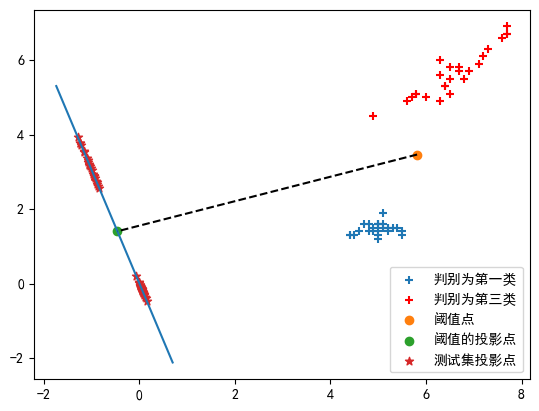

In [9]:
'''8.对分类结果进行绘图'''
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
dir=plt.plot([-5*direction[0],2*direction[0]],[-5*direction[1],2*direction[1]],label='投影方向')#画出最佳投影方向
# 将分类结果转换为矩阵
res1 = np.mat(res1)
res2 = np.mat(res2)
'''
(1)画出分别属于第一类和第三类的各点
其中plt.scatter是绘制散点图，np.tolist为矩阵转列表
'''
point1 = plt.scatter(res1[:,0].tolist(),res1[:,1].tolist(),marker = '+')
point2 = plt.scatter(res2[:,0].tolist(),res2[:,1].tolist(),c='red',marker = '+')
'''
(2)画出阈值在投影前的点以及阈值投影在直线上的点
并将两点连线，画出分类面。
'''
mean12 = 0.5*(mean1+mean2) # 实际空间的阈值点
mean21 = np.dot(np.dot(mean12,dire),dire_tran) # 阈值在投影方向的投影点坐标
point_mean1 = plt.scatter(mean12[0],mean12[1])
point_mean2 = plt.scatter(mean21[0],mean21[1])
classify = plt.plot([mean12[0],mean21[0]],[mean12[1],mean21[1]],c='black',linestyle='dashed',label='分类面')#画出分类面
plt.legend()
'''
(3)画出测试集各点在投影方向上的投影点
'''
p = plt.scatter(dir_point[:,0].tolist(),dir_point[:,1].tolist(),marker='*')
'''
(4)对所绘制图像增添一些图文符号解释
'''
plt.legend([point1,point2,point_mean1,point_mean2,p],['判别为第一类','判别为第三类','阈值点','阈值的投影点','测试集投影点'])
plt.show()